In [28]:
#import libraries
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

In [29]:
#retrieve data
df=pd.read_csv("/kaggle/input/nsei-prev-data/in_nsei_daily.csv",index_col='minute', parse_dates=True).close
df.index = df.index.to_pydatetime()
df.head()

2017-01-02 09:15:00+05:30    8178.70
2017-01-03 09:15:00+05:30    8188.60
2017-01-04 09:15:00+05:30    8196.55
2017-01-05 09:15:00+05:30    8269.90
2017-01-06 09:15:00+05:30    8247.85
Name: close, dtype: float64

In [30]:
df = pd.DataFrame(df)
df

,close
2017-01-02 09:15:00+05:30,8178.70
2017-01-03 09:15:00+05:30,8188.60
2017-01-04 09:15:00+05:30,8196.55
2017-01-05 09:15:00+05:30,8269.90
2017-01-06 09:15:00+05:30,8247.85
...,...
2022-12-26 09:15:00+05:30,18010.30
2022-12-27 09:15:00+05:30,18136.00
2022-12-28 09:15:00+05:30,18109.25
2022-12-29 09:15:00+05:30,18207.10


In [31]:
#feature extraction
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

In [32]:
#store features
features=['month', 'year', 'day_of_year']
target='close'

In [33]:
#train and test splits
xtrain, xtest, ytrain, ytest=train_test_split(df[features], df[target], test_size=0.15)

In [47]:
#define model
xgbr = xgb.XGBRegressor() 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [48]:
#fit the model
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [50]:
#get score
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9997681756201809


In [51]:
#apply cross validation
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [52]:
#apply k-folds
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [54]:
#calculate accuracy
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 16332.65
RMSE: 127.80


In [57]:
ytest.index

DatetimeIndex(['2021-08-27 09:15:00+05:30', '2019-06-18 09:15:00+05:30',
               '2019-10-18 09:15:00+05:30', '2017-09-13 09:15:00+05:30',
               '2017-05-19 09:15:00+05:30', '2017-09-20 09:15:00+05:30',
               '2019-12-17 09:15:00+05:30', '2019-08-27 09:15:00+05:30',
               '2021-06-22 09:15:00+05:30', '2021-10-13 09:15:00+05:30',
               ...
               '2019-03-19 09:15:00+05:30', '2019-07-04 09:15:00+05:30',
               '2022-07-11 09:15:00+05:30', '2018-03-13 09:15:00+05:30',
               '2019-01-14 09:15:00+05:30', '2018-04-02 09:15:00+05:30',
               '2021-04-08 09:15:00+05:30', '2018-05-16 09:15:00+05:30',
               '2022-08-30 09:15:00+05:30', '2017-04-24 09:15:00+05:30'],
              dtype='datetime64[ns, pytz.FixedOffset(330)]', length=222, freq=None)

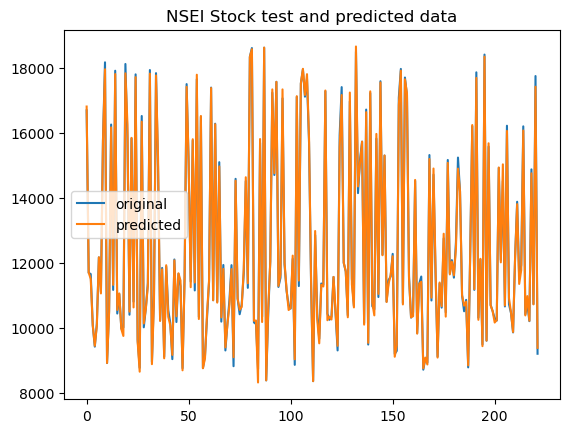

In [59]:
#plot data, better results
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("NSEI Stock test and predicted data")
plt.legend()
plt.show()